<a href="https://colab.research.google.com/github/nicolassmarti/HE2_IA_P1/blob/main/Codigo_Definitivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalación de librerias

In [1]:
# Instalación silenciosa de librerías
!pip install -q pandas
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly
!pip install -q yellowbrick
!pip install -q scikit-learn
!pip install -q imbalanced-learn
!pip install -q tqdm
!pip install -q joblib
!pip install -q huggingface_hub
!pip install -q datasets
!pip install -q fsspec==2024.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.5 MB/s eta 0:00:00


##Carga de la Base de Datos

In [2]:
# Importamos las librerías necesarias
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Cargamos el dataset y lo mezclamos
dataset = load_dataset("13nishit/LoanApprovalPrediction")
print(dataset)

dataset = load_dataset("13nishit/LoanApprovalPrediction", streaming=True)
df = pd.DataFrame(list(dataset['train'].shuffle(seed=42)))


README.md:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

dataset.csv:   0%|          | 0.00/37.4k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/614 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
        num_rows: 614
    })
})


##Procesamiento de datos


=== Información del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

=== Valores únicos por columna ===

Loan_ID:
Tipo de dato: object
Valor

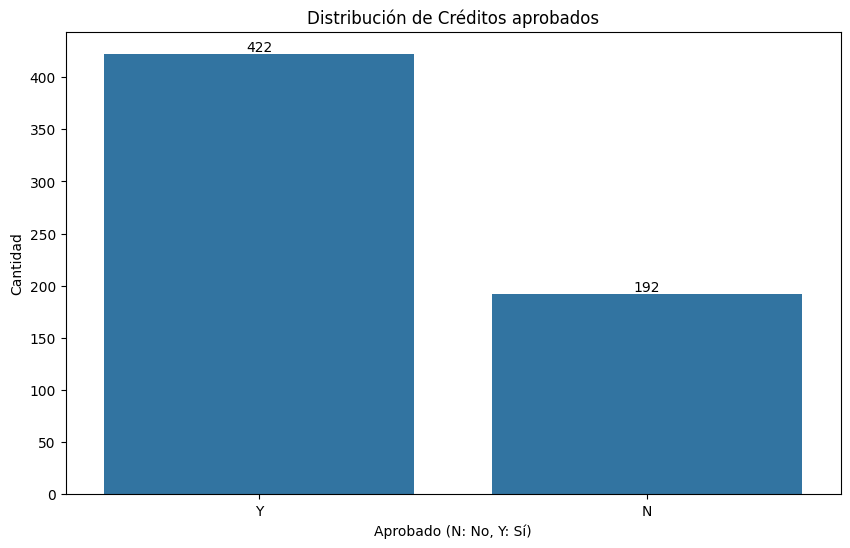

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
1,LP001345,Male,Yes,2,Not Graduate,No,4288,3263.0,133.0,180.0,1.0,Urban,Y
2,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
3,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
4,LP002315,Male,Yes,1,Graduate,No,8300,0.0,152.0,300.0,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y
610,LP002705,Male,Yes,0,Graduate,No,3775,0.0,110.0,360.0,1.0,Semiurban,Y
611,LP001498,Male,No,0,Graduate,No,5417,0.0,168.0,360.0,1.0,Urban,Y
612,LP002776,Female,No,0,Graduate,No,5000,0.0,103.0,360.0,0.0,Semiurban,N


In [3]:
# 1. Examinamos la información básica del DataFrame
print("\n=== Información del DataFrame ===")
print(df.info())

# 2. Verificamos los tipos de datos y valores únicos para cada columna
print("\n=== Valores únicos por columna ===")
for column in df.columns:
    print(f"\n{column}:")
    print(f"Tipo de dato: {df[column].dtype}")
    print(f"Valores únicos: {df[column].nunique()}")

# Filtrar valores nulos antes de ordenar
    unique_values = [val for val in df[column].unique() if pd.notna(val)]

    # Ordenar solo si hay valores no nulos
    if unique_values:
        print(f"Primeros valores únicos: {sorted(unique_values)[:5]}")
    else:
        print("Primeros valores únicos: No hay valores válidos")

# 3. Verificamos valores nulos
print("\n=== Valores nulos ===")
print(df.isnull().sum())

# 4. Estadísticas descriptivas básicas
print("\n=== Estadísticas descriptivas ===")
print(df.describe())

# 5. Debalance de clases

print("📊 Distribución de la variable objetivo (Loan_Status):")
class_dist = df['Loan_Status'].value_counts(normalize=True)
print("\nPorcentajes:")
for clase, porcentaje in class_dist.items():
    print(f"Clase {clase}: {porcentaje*100:.2f}%")

# Visualizamos la distribución con un gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Loan_Status')
plt.title('Distribución de Créditos aprobados')
plt.xlabel('Aprobado (N: No, Y: Sí)')
plt.ylabel('Cantidad')

# Añadimos los valores exactos sobre cada barra
for i in plt.gca().containers[0]:
    plt.text(i.get_x() + i.get_width()/2,
            i.get_height(),
            f'{int(i.get_height())}',
            ha='center', va='bottom')

plt.show()

df

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

def categorize_features(df):
    """
    Separa las características en numéricas y categóricas.
    """
    # Variables numéricas (montos y edad)
    numeric_features = ['ApplicantIncome', 'CoapplicantIncome',
        'LoanAmount', 'Loan_Amount_Term']

    # Variables categóricas
    categorical_features = [
        'Gender', 'Married', 'Education',
        'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status', 'Dependents']

    # Add a return statement
    return numeric_features, categorical_features

def clean_categorical_data(df):
    """
    Limpia y corrige valores en variables categóricas.
    """
    df = df.copy()
    # Check if 'Dependents' column exists
    if 'Dependents' in df.columns:
        # Replace '3+' with '3' if 'Dependents' column exists
        df['Dependents'] = df['Dependents'].replace('3+', '3')
    return df

def preprocess_data(df):
    """
    Realiza el preprocesamiento completo de los datos.
    """
    # 1. Separar features
    numeric_features, categorical_features = categorize_features(df)

    # 2. Limpiar datos categóricos
    df = clean_categorical_data(df)

    # 3. Estandarizar variables numéricas
    scaler = StandardScaler()
    df[numeric_features] = scaler.fit_transform(df[numeric_features])

    # 4. Codificar variable objetivo Loan_Status (Y -> 1, N -> 0)
    df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

    # 5. Codificar otras Variables
    df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
    df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

    # 6. Crear dummies para Property_Area
    df = pd.get_dummies(df, columns=['Property_Area'], prefix='', prefix_sep='')
    # Convertir solo las columnas dummy a int. Rellenar NaNs con 0 en columnas numéricas.
    for col in ['Rural', 'Semiurban', 'Urban']:
        df[col] = df[col].fillna(0).astype(int)

    # 7. Crear dummies para Gender
    df = pd.get_dummies(df, columns=['Gender'], prefix='', prefix_sep='')
    # Convertir solo las columnas dummy a int. Rellenar NaNs con 0 en columnas numéricas.
    for col in ['Female', 'Male']:
        df[col] = df[col].fillna(0).astype(int)

    # 8. Revisar si Loan_ID
    print("Valores únicos en Loan_ID:", df['Loan_ID'].nunique())
    print("Número de filas:", len(df))
    # Al ser valores unicos se puedes eliminar
    # Guardar los IDs (opcional)
    loan_ids = df['Loan_ID']
    # Eliminar la columna de ID
    df = df.drop(columns=['Loan_ID'])
    # Verificar que la columna se eliminó
    print("Columnas después de eliminar Loan_ID:", df.columns)

    # 9. Imputación de valores nulos
    # Imputación con la moda para columnas categóricas
    imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
    columns_median = ['Married', 'Self_Employed', 'Dependents', 'Credit_History']
    df[columns_median] = imputer_median.fit_transform(df[columns_median])

    # Imputación con la media para columnas numéricas
    imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    columns_mean = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
    df[columns_mean] = imputer_mean.fit_transform(df[columns_mean])

    # 10. Verificar que no queden valores nulos
    print("\nValores nulos después de la imputación:")
    print(df.isnull().sum())

    #11. Eliminamos Valores nulos para Loan_Amount_Term
    df = df.dropna(subset=['Loan_Amount_Term'])

    # Verificar que las filas se han eliminado
    print("Número de filas después de eliminar valores nulos en 'Loan_Amount_Term':", len(df))
    print("\nValores nulos después de la eliminación:")
    print(df.isnull().sum())

    # 12. Separar features y target
    X = df.drop('Loan_Status', axis=1)
    y = df['Loan_Status']

    # 13. Guardar información del preprocesamiento
    preprocessing_info = {
        'numeric_features': numeric_features,
        'categorical_features': categorical_features,
        'scaler': scaler,
        'imputer_mode': imputer_median,
        'imputer_mean': imputer_mean
    }

    return X, y, preprocessing_info

def print_preprocessing_summary(X, y):
    """
    Imprime un resumen del preprocesamiento.
    """
    print("\n=== Resumen del Preprocesamiento ===")
    print(f"Dimensiones de X: {X.shape}")

    print("\nDistribución de clases:")
    print(pd.Series(y).value_counts(normalize=True).round(3))

    print("\nEstadísticas de algunas variables numéricas:")
    print(X.describe().round(2).head())



In [5]:
# Ejecutar el Preprocesamiento

# Importar y cargar datos
from datasets import load_dataset
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd


# 1. Cargar datos
dataset = load_dataset("13nishit/LoanApprovalPrediction", streaming=True)
df = pd.DataFrame(list(dataset['train'].shuffle(seed=42)))

# 2. Aplicar preprocesamiento
X, y, preprocessing_info = preprocess_data(df)

# 3. Imprimir resumen
print_preprocessing_summary(X, y)

# 4. Verificar las características procesadas
print("\n=== Características procesadas ===")
print("\nCaracterísticas numéricas:")
print(preprocessing_info['numeric_features'])
print("\nCaracterísticas categóricas:")
print(preprocessing_info['categorical_features'])

# 5. Mostrar información adicional sobre los datos procesados
print("\n=== Información adicional ===")
print(f"Número total de características: {X.shape[1]}")
print(f"Número total de observaciones: {X.shape[0]}")
print("\nPrimeras columnas del dataset procesado:")
print(X.head())


Valores únicos en Loan_ID: 614
Número de filas: 614
Columnas después de eliminar Loan_ID: Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Rural',
       'Semiurban', 'Urban', 'Female', 'Male'],
      dtype='object')

Valores nulos después de la imputación:
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Loan_Status           0
Rural                 0
Semiurban             0
Urban                 0
Female                0
Male                  0
dtype: int64
Número de filas después de eliminar valores nulos en 'Loan_Amount_Term': 600

Valores nulos después de la eliminación:
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0


##Preparación para el entrenamiento

In [6]:
# --- PREPARACIÓN PARA EL ENTRENAMIENTO ---

# Importamos las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import xgboost as xgb
import numpy as np
import pandas as pd

# Fijamos la semilla aleatoria para garantizar reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# División estratificada de datos (80% entrenamiento, 20% prueba)
# stratify=y asegura que la proporción de las clases se mantenga
X_train, X_test, y_train, y_test = train_test_split(
    X,              # Matriz de características
    y,              # Vector objetivo (default/no default)
    test_size=0.2,  # 20% para prueba
    random_state=RANDOM_STATE,
    stratify=y      # Mantiene proporción de clases
)

# Para XGBoost, necesitamos un conjunto de validación
X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y_train
)

# Definición de los modelos a entrenar
models = {

    # Random Forest
    "RandomForest": RandomForestClassifier(
        n_estimators=100,       # Número de árboles en el bosque
        max_depth=None,         # Permite árboles profundos
        min_samples_leaf=5,     # Control básico de overfitting
        max_features='sqrt',    # Número de features a considerar en cada split
        n_jobs=-1,             # Usa todos los núcleos disponibles
        random_state=RANDOM_STATE
    ),

    # XGBoost
    "XGBoost": xgb.XGBClassifier(
        learning_rate=0.1,      # Tamaño de paso en cada iteración
        n_estimators=100,       # Número máximo de árboles
        max_depth=6,           # Profundidad fija para control de complejidad
        early_stopping_rounds=20,# Detiene el entrenamiento si no hay mejora en 20 rondas
        min_child_weight=1,     # Control de overfitting similar a min_samples_leaf
        subsample=0.8,          # Fracción de muestras para cada árbol
        colsample_bytree=0.8,   # Fracción de features para cada árbol
        eval_metric=['auc', 'error', 'logloss'],  # Múltiples métricas de evaluación
        random_state=RANDOM_STATE,
        enable_categorical=False # Deshabilitamos características categóricas
    ),

    # K-Nearest Neighbors (KNN)
    # La elección de k se basa en la raíz cuadrada del número de muestras
    "KNN": KNeighborsClassifier(
        n_neighbors=int(np.sqrt(len(X_train))),  # k basado en regla de la raíz
        weights='uniform',       # Todos los vecinos tienen el mismo peso
        metric='euclidean'      # Distancia euclidiana para similitud
    ),

    # Support Vector Machine (SVM)
    # Utilizamos kernel RBF para capturar relaciones no lineales
    "SVM": SVC(
        kernel='rbf',           # Tipo de kernel: 'linear', 'poly', 'rbf', 'sigmoid'
        C=1.0,                  # Parámetro de margen suave (soft margin):
                               # - C grande: margen más estrecho, menos errores permitidos
                               # - C pequeño: margen más amplio, más errores permitidos
        gamma='scale',          # Coeficiente γ para kernel RBF: exp(-γ||x₁ - x₂||²)
                               # 'scale' calcula γ = 1 / (n_features * X.var())
        random_state=RANDOM_STATE
    ),

    # PCA + KNN
    # Combinamos reducción de dimensionalidad con clasificación
    "PCA-KNN": {
        'pca': PCA(
            n_components=0.95,   # Mantener 95% de la varianza explicada
            random_state=RANDOM_STATE
        ),
        'knn': KNeighborsClassifier(
            n_neighbors=5,       # k inicial para clasificación
            weights='uniform',
            metric='euclidean'
        )
    }
}

# Diccionarios para almacenar resultados
predictions = {}      # Predicciones binarias (0/1)
probabilities = {}    # Probabilidades [0,1]
xgb_results = {}     # Para almacenar resultados de evaluación de XGBoost
components = {}      # Almacenará componentes principales para PCA

# Información sobre la división de datos
print("=== Información de la División de Datos ===")
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de X_val_xgb (para XGBoost): {X_val_xgb.shape}")
print("\nDistribución de clases:")
print("\nConjunto de entrenamiento:")
print(pd.Series(y_train).value_counts(normalize=True).round(3))
print("\nConjunto de prueba:")
print(pd.Series(y_test).value_counts(normalize=True).round(3))
print("\nConjunto de validación XGBoost:")
print(pd.Series(y_val_xgb).value_counts(normalize=True).round(3))


=== Información de la División de Datos ===
Dimensiones de X_train: (480, 14)
Dimensiones de X_test: (120, 14)
Dimensiones de X_val_xgb (para XGBoost): (96, 14)

Distribución de clases:

Conjunto de entrenamiento:
Loan_Status
1    0.69
0    0.31
Name: proportion, dtype: float64

Conjunto de prueba:
Loan_Status
1    0.692
0    0.308
Name: proportion, dtype: float64

Conjunto de validación XGBoost:
Loan_Status
1    0.688
0    0.312
Name: proportion, dtype: float64


#Version GridSearch

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, OneHotEncoder

In [8]:
# Por si queremos aplicar OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


In [9]:
def train_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test):
    results = {}
    best_estimators = {}

    for name, model in models.items():
        print(f"Entrenando {name}...")

        # Búsqueda de hiperparámetros con GridSearchCV
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Mejor modelo encontrado
        best_model = grid_search.best_estimator_
        best_estimators[name] = best_model  # Guardar el mejor modelo

        y_pred = best_model.predict(X_test)

        # Evaluar métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = {
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "Best Params": grid_search.best_params_
        }

        print(f"\n🔹 Mejor estimador para {name}:\n{best_model}")
        print(f"🔹 Mejores hiperparámetros: {grid_search.best_params_}\n")

    return results, best_estimators

In [10]:
# Definición de modelos para encontrar hiperparámetros óptimos
model_grid_nonSMOTE ={
    "SVM": SVR(),
    "Random Forest Classifier": RandomForestClassifier(random_state=42)
}

In [11]:
 # Definición de hiperparámetros para GridSearch
param_grids = {
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Random Forest Classifier": {"n_estimators": [50, 100, 200], "max_depth": [None, 5, 10, 15, 20]}
}

In [13]:
# Ejecutar entrenamiento y evaluación con impresión de los mejores modelos
#results, best_estimators = train_and_evaluate(model_grid_nonSMOTE, param_grids, X_train_scaled, y_train, X_test_scaled, y_test)

#Iniciar entrenamiento

In [23]:
# --- ENTRENAMIENTO DE MODELOS ---

def print_model_info(name, model, X_train):
    """
    Imprime información relevante según el tipo de modelo
    """
    print(f"\nInformación para {name}:")

    if hasattr(model, 'feature_importances_'):
        # Para modelos basados en árboles que tienen importancia de características
        importances = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)

        print("\nTop 5 características más importantes:")
        print(importances.head())
        print("\nTop 5 características menos importantes:")
        print(importances.tail())

    # Información específica para cada tipo de modelo
    if name == "RandomForest":
        print(f"\nNúmero de árboles: {model.n_estimators}")
        print(f"Máxima profundidad: {model.max_depth if model.max_depth else 'No limitada'}")
        print(f"Features por split: {model.max_features}")
    elif name == "XGBoost":
        print("\nMejor iteración: ", model.best_iteration if hasattr(model, 'best_iteration') else None)
        print(f"Tasa de aprendizaje: {model.learning_rate}")
        print(f"Número de estimadores: {model.n_estimators}")
    elif name == "KNN":
        print(f"\nNúmero de vecinos (k): {model.n_neighbors}")
        print(f"Métrica de distancia: {model.metric}")
    elif name == "SVM":
        print(f"\nTipo de kernel: {model.kernel}")
        print(f"Parámetro C (regularización): {model.C}")
        print(f"Parámetro gamma: {model.gamma}")
    elif name == "PCA-KNN":
        print(f"\nNúmero de componentes principales: {model['pca'].n_components_}")
        print(f"Varianza explicada acumulada: {np.sum(model['pca'].explained_variance_ratio_):.2f}")
        print(f"Número de vecinos (k): {model['knn'].n_neighbors}")
        print(f"Métrica de distancia: {model['knn'].metric}")

# Iteramos sobre cada modelo para entrenamiento y predicciones
for name, model in models.items():
    print(f"\n=== Entrenando modelo: {name} ===")

    # Entrenamiento del modelo
    if name == "XGBoost":
        # Usamos los conjuntos de validación previamente creados
        model.fit(
            X_train_xgb, y_train_xgb,
            eval_set=[(X_train_xgb, y_train_xgb), (X_val_xgb, y_val_xgb)],
            verbose=False
        )

        predictions[name] = model.predict(X_test)
        probabilities[name] = model.predict_proba(X_test)[:, 1]
    elif name == "PCA-KNN":
        # Aplicamos PCA primero
        components[name] = model['pca'].fit_transform(X_train)
        model['knn'].fit(components[name], y_train)

        # Transformamos el conjunto de prueba con el PCA ajustado
        X_test_pca = model['pca'].transform(X_test)
        predictions[name] = model['knn'].predict(X_test_pca)
        probabilities[name] = model['knn'].predict_proba(X_test_pca)[:, 1]
    elif name == "SVM":
        # Configuramos probability=True para habilitar predict_proba
        model.set_params(probability=True)
        model.fit(X_train, y_train)
        predictions[name] = model.predict(X_test)
        probabilities[name] = model.predict_proba(X_test)[:, 1]
    else:
        # Para RandomForest y KNN
        model.fit(X_train, y_train)
        predictions[name] = model.predict(X_test)
        probabilities[name] = model.predict_proba(X_test)[:, 1]

    # Mostrar información del modelo
    print_model_info(name, model, X_train)

# Calculamos y mostramos el tiempo de ejecución promedio para predicciones
import time

print("\n=== Evaluación de Tiempo de Predicción ===")
for name, model in models.items():
    times = []
    for _ in range(100):  # 100 predicciones para promedio estable
        start_time = time.time()
        if name == "PCA-KNN":
            X_test_pca = model['pca'].transform(X_test[:100])
            model['knn'].predict(X_test_pca)
        else:
            model.predict(X_test[:100])
        times.append(time.time() - start_time)

    print(f"\n{name}:")
    print(f"Tiempo promedio de predicción: {np.mean(times)*1000:.2f} ms")
    print(f"Desviación estándar: {np.std(times)*1000:.2f} ms")


=== Entrenando modelo: XGBoost ===

Información para XGBoost:

Top 5 características más importantes:
           Feature  Importance
8   Credit_History    0.393930
10       Semiurban    0.079271
2        Education    0.064153
12          Female    0.053121
1       Dependents    0.052235

Top 5 características menos importantes:
             Feature  Importance
7   Loan_Amount_Term    0.044148
9              Rural    0.042707
3      Self_Employed    0.034393
11             Urban    0.022599
13              Male    0.020473

Mejor iteración:  None
Tasa de aprendizaje: 0.1
Número de estimadores: 100

=== Entrenando modelo: RandomForest ===

Información para RandomForest:

Top 5 características más importantes:
             Feature  Importance
8     Credit_History    0.391958
4    ApplicantIncome    0.162289
6         LoanAmount    0.124670
5  CoapplicantIncome    0.109947
1         Dependents    0.037202

Top 5 características menos importantes:
             Feature  Importance
9        

#Métricas y verificación

##Métricas De Evaluación De Modelos De Aprovación De Crédito

<ipython-input-17-23b5deddae80>:66: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_metrics[col] = pd.to_numeric(df_metrics[col], errors='ignore')



=== Tabla Comparativa de Métricas ===
      Modelo Accuracy Precision Recall F1-Score AUC-ROC
RandomForest   0.8500    0.8218 1.0000   0.9022  0.8072
     XGBoost   0.8167    0.8144 0.9518   0.8778  0.8072
         KNN   0.7417    0.7281 1.0000   0.8426  0.7291
         SVM   0.8417    0.8137 1.0000   0.8973  0.8359
     PCA-KNN   0.6750    0.7157 0.8795   0.7892  0.6202

=== Matrices de Confusión ===


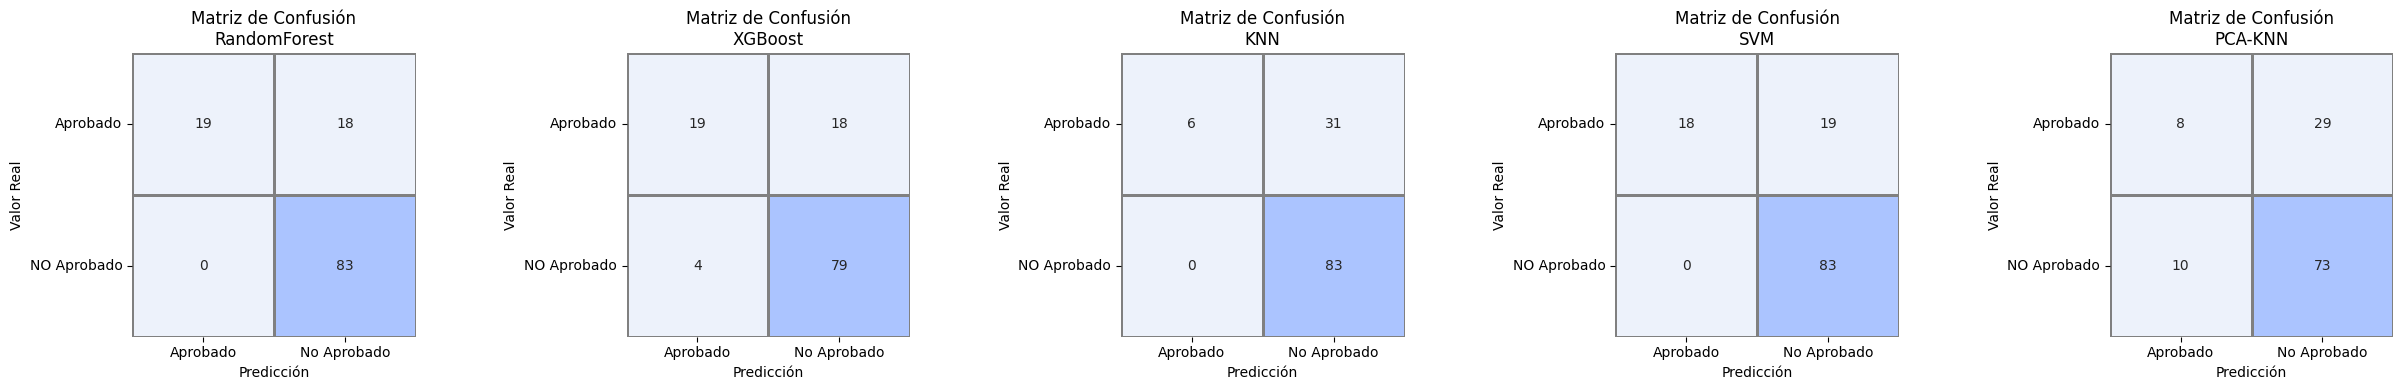


=== Curvas ROC ===


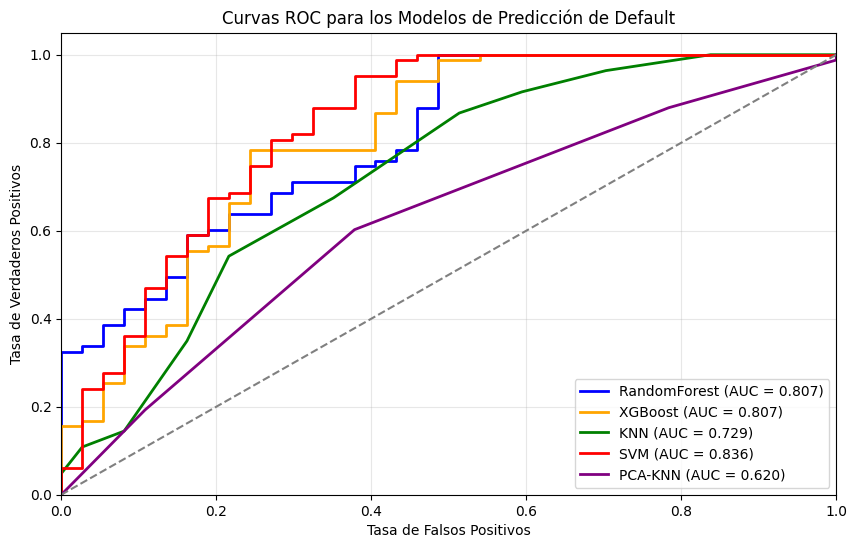

In [17]:
# --- Evaluación y Métricas Tradicionales ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)

class ModelEvaluator:
    def __init__(self, y_true, predictions, probabilities):
        """
        Inicializa el evaluador con los datos necesarios.

        Parámetros:
        -----------
        y_true: array-like
            Etiquetas verdaderas
        predictions: dict
            Diccionario con predicciones de cada modelo
        probabilities: dict
            Diccionario con probabilidades de cada modelo
        """
        # Asegurar que los datos estén en el formato correcto
        self.y_true = np.array(y_true)
        self.predictions = {k: np.array(v) for k, v in predictions.items()}
        self.probabilities = {k: np.array(v) for k, v in probabilities.items()}
        self.colors = ["#EDF2FB", "#ABC4FF"]

    def create_metrics_table(self):
        """
        Crea una tabla comparativa con las métricas de todos los modelos.
        """
        metrics = []
        for name, pred in self.predictions.items():
            try:
                metric_dict = {
                    'Modelo': name,
                    'Accuracy': accuracy_score(self.y_true, pred),
                    'Precision': precision_score(self.y_true, pred, zero_division=0),
                    'Recall': recall_score(self.y_true, pred),
                    'F1-Score': f1_score(self.y_true, pred),
                    'AUC-ROC': roc_auc_score(self.y_true, self.probabilities[name])
                }
            except Exception as e:
                print(f"Error calculando métricas para {name}: {str(e)}")
                metric_dict = {
                    'Modelo': name,
                    'Accuracy': 'Error',
                    'Precision': 'Error',
                    'Recall': 'Error',
                    'F1-Score': 'Error',
                    'AUC-ROC': 'Error'
                }

            metrics.append(metric_dict)

        df_metrics = pd.DataFrame(metrics)

        # Formatear las columnas numéricas
        numeric_columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

        for col in numeric_columns:
            if col in df_metrics.columns:
                df_metrics[col] = pd.to_numeric(df_metrics[col], errors='ignore')
                df_metrics[col] = df_metrics[col].apply(
                    lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x
                )

        return df_metrics

    def plot_confusion_matrices(self):
        """
        Visualiza las matrices de confusión para modelos de clasificación.
        """
        n_models = len(self.predictions)
        fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 4))
        if n_models == 1:
            axes = [axes]

        cmap = sns.color_palette(self.colors, as_cmap=True)

        for idx, (name, y_pred) in enumerate(self.predictions.items()):
            try:
                cm = confusion_matrix(self.y_true, y_pred)
                sns.heatmap(
                    cm,
                    annot=True,
                    fmt='d',
                    ax=axes[idx],
                    cmap=cmap,
                    cbar=False,
                    linewidths=1,
                    linecolor='gray',
                    square=True
                )
                axes[idx].set_title(f'Matriz de Confusión\n{name}')
                axes[idx].set_xlabel('Predicción')
                axes[idx].set_ylabel('Valor Real')
                axes[idx].set_xticklabels(['Aprobado', 'No Aprobado'])
                axes[idx].set_yticklabels(['Aprobado', 'NO Aprobado'], rotation=0)
            except Exception as e:
                print(f"Error al crear matriz de confusión para {name}: {str(e)}")

        plt.tight_layout()
        return fig

    def plot_roc_curves(self):
        """
        Visualiza las curvas ROC para modelos de clasificación.
        """
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = ['blue', 'orange', 'green', 'red', 'purple']  # Añadir más colores si es necesario

        for (name, probs), color in zip(self.probabilities.items(), colors):
            try:
                fpr, tpr, _ = roc_curve(self.y_true, probs)
                auc = roc_auc_score(self.y_true, probs)
                ax.plot(fpr, tpr, color=color, lw=2,
                       label=f'{name} (AUC = {auc:.3f})')
            except Exception as e:
                print(f"Error al crear curva ROC para {name}: {str(e)}")

        ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
        ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.05],
               xlabel='Tasa de Falsos Positivos',
               ylabel='Tasa de Verdaderos Positivos',
               title='Curvas ROC para los Modelos de Predicción de Default')
        ax.legend(loc="lower right")
        ax.grid(True, alpha=0.3)

        return fig

    def evaluate_all(self):
        """
        Ejecuta todas las evaluaciones y muestra los resultados.
        """
        # Tabla de métricas
        try:
            metrics_table = self.create_metrics_table()
            print("\n=== Tabla Comparativa de Métricas ===")
            print(metrics_table.to_string(index=False))
        except Exception as e:
            print(f"Error al crear tabla de métricas: {str(e)}")

        # Matrices de confusión
        print("\n=== Matrices de Confusión ===")
        cm_fig = self.plot_confusion_matrices()
        if cm_fig:
            plt.show()

        # Curvas ROC
        print("\n=== Curvas ROC ===")
        roc_fig = self.plot_roc_curves()
        if roc_fig:
            plt.show()

def evaluar_modelos(y_test, predictions, probabilities):
    """
    Función auxiliar para ejecutar la evaluación simplificada de modelos.

    Parámetros:
    -----------
    y_test : array-like
        Etiquetas verdaderas
    predictions : dict
        Diccionario con predicciones de cada modelo
    probabilities : dict
        Diccionario con probabilidades de cada modelo
    """
    evaluator = ModelEvaluator(y_test, predictions, probabilities)
    evaluator.evaluate_all()

# Ejemplo de uso:
evaluar_modelos(y_test, predictions, probabilities)

##Métricas de Evaluación Avanzadas

=== Análisis de Entropía para Modelos de Clasificación ===

Entropía media para RandomForest: 0.5481

Entropía media para XGBoost: 0.5132

Entropía media para KNN: 0.5080

Entropía media para SVM: 0.5122

Entropía media para PCA-KNN: 0.4961


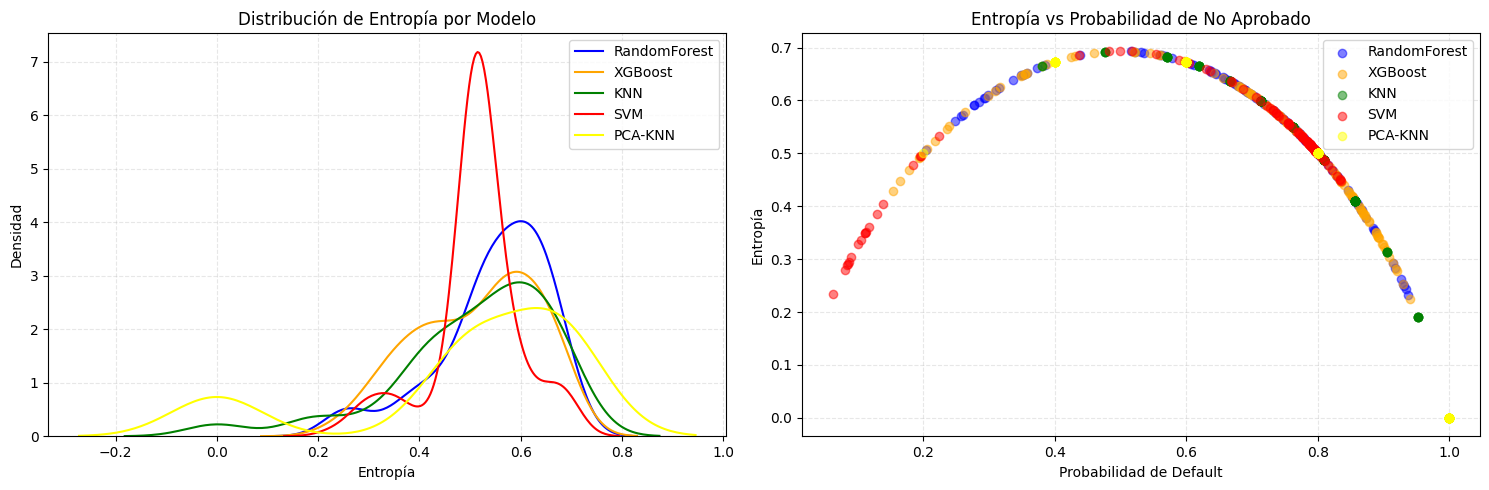


Entropía media por clase real:

RandomForest:
Clase 0 (No Default): 0.5962
Clase 1 (Default): 0.5266

XGBoost:
Clase 0 (No Default): 0.5552
Clase 1 (Default): 0.4945

KNN:
Clase 0 (No Default): 0.5794
Clase 1 (Default): 0.4762

SVM:
Clase 0 (No Default): 0.4699
Clase 1 (Default): 0.5311

PCA-KNN:
Clase 0 (No Default): 0.5536
Clase 1 (Default): 0.4705


In [21]:
# --- Análisis de Entropía para Modelos de Clasificación ---

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

def calculate_entropy(probabilities):
    """
    Calcula la entropía de las predicciones para clasificación binaria.

    Parámetros:
    -----------
    probabilities: array-like
        Array de probabilidades de la clase positiva (default)

    Retorna:
    --------
    array-like
        Valores de entropía para cada predicción
    """
    # Convertir a probabilidades de ambas clases
    p = np.vstack([1 - probabilities, probabilities]).T
    return entropy(p, axis=1)

def analyze_entropy(y_true, probabilities):
    """
    Analiza y visualiza la entropía de las predicciones de los modelos de clasificación.

    Parámetros:
    -----------
    y_true: array-like
        Etiquetas verdaderas
    probabilities: dict
        Diccionario con las probabilidades predichas por cada modelo
    """
    # Calcular entropía para cada modelo
    entropy_dict = {}
    mean_entropy_dict = {}

    # Verificar que hay modelos para analizar
    if not probabilities:
        print("No hay modelos para analizar la entropía.")
        return

    for name, probs in probabilities.items():
        try:
            entropy_vals = calculate_entropy(probs)
            entropy_dict[name] = entropy_vals
            mean_entropy_dict[name] = np.mean(entropy_vals)
            print(f"\nEntropía media para {name}: {mean_entropy_dict[name]:.4f}")
        except Exception as e:
            print(f"Error calculando entropía para {name}: {str(e)}")
            continue

    # Crear subplot con dos gráficas
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # 1. Distribución de entropía
    colors = ['blue', 'orange', 'green', 'red', 'yellow']
    for (name, entropy_vals), color in zip(entropy_dict.items(), colors):
        sns.kdeplot(data=entropy_vals, label=name, ax=ax1, color=color)
    ax1.set_title('Distribución de Entropía por Modelo')
    ax1.set_xlabel('Entropía')
    ax1.set_ylabel('Densidad')
    ax1.legend()
    ax1.grid(True, alpha=0.3)


    # 2. Entropía vs Probabilidad predicha
    for (name, entropy_vals), color in zip(entropy_dict.items(), colors):
        ax2.scatter(probabilities[name], entropy_vals,
                   alpha=0.5, label=name, color=color)
    ax2.set_title('Entropía vs Probabilidad de No Aprobado')
    ax2.set_xlabel('Probabilidad de Default')
    ax2.set_ylabel('Entropía')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Análisis adicional: Entropía por clase real
    print("\nEntropía media por clase real:")
    for name, entropy_vals in entropy_dict.items():
        print(f"\n{name}:")
        for clase in [0, 1]:
            mask = y_true == clase
            mean_entropy = np.mean(entropy_vals[mask])
            print(f"Clase {clase} ({'No Default' if clase == 0 else 'Default'}): {mean_entropy:.4f}")

# Ejecutar el análisis
print("=== Análisis de Entropía para Modelos de Clasificación ===")
analyze_entropy(y_test, probabilities)

##Validación Cruzada

In [19]:
# Importación de bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import (KFold, StratifiedKFold, cross_validate,
                                   learning_curve, train_test_split)
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import xgboost as xgb

# Configuración global
RANDOM_STATE = 42
plt.rcParams.update({
    'figure.autolayout': True,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.axisbelow': True,
    'grid.linestyle': '--'
})

def get_cross_validation_results(X, y, k=5):
    """
    Realiza validación cruzada para todos los modelos.
    """
    # Definición de modelos
    models = {
        'XGBoost': xgb.XGBClassifier(
            learning_rate=0.1,
            n_estimators=100,
            max_depth=6,
            random_state=RANDOM_STATE
        ),
        'RandomForest': RandomForestClassifier(
            n_estimators=100,
            max_depth=None,
            min_samples_leaf=5,
            max_features='sqrt',
            n_jobs=-1,
            random_state=RANDOM_STATE
        ),
        'KNN': KNeighborsClassifier(
            n_neighbors=5,
            weights='uniform',
            metric='euclidean'
        ),
        'PCA+KNN': Pipeline([
            ('pca', PCA(n_components=0.95, random_state=RANDOM_STATE)),
            ('knn', KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean'))
        ]),
        'SVM': SVC(
            kernel='rbf',
            C=1.0,
            gamma='scale',
            probability=True,
            random_state=RANDOM_STATE
        )
    }

    # Definición de métricas
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0)
    }

    # Inicialización de resultados
    kfold_results = {}
    stratified_results = {}

    # Objetos de validación cruzada
    kfold = KFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)
    stratified = StratifiedKFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)

    # Validación cruzada para cada modelo
    for name, model in models.items():
        print(f"\nProcesando {name}...")
        try:
            # K-Fold estándar
            kfold_results[name] = cross_validate(
                model, X, y,
                scoring=scoring,
                cv=kfold,
                return_train_score=True
            )

            # Validación estratificada
            stratified_results[name] = cross_validate(
                model, X, y,
                scoring=scoring,
                cv=stratified,
                return_train_score=True
            )
        except Exception as e:
            print(f"Error procesando {name}: {str(e)}")

    return kfold_results, stratified_results, models

def plot_cv_results(kfold_results, stratified_results):
    """
    Visualiza resultados de validación cruzada con boxplots.
    """
    metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']

    fig = plt.figure(figsize=(20, 16))
    plt.subplots_adjust(top=0.9)

    for idx, metric in enumerate(metrics):
        # K-Fold
        ax1 = plt.subplot(4, 2, 2*idx + 1)
        data_kfold = [kfold_results[model][metric] for model in kfold_results.keys()]
        ax1.boxplot(data_kfold)
        ax1.set_xticklabels(list(kfold_results.keys()), rotation=45)
        ax1.set_title(f'K-Fold CV: {metric.replace("test_", "").capitalize()}')
        ax1.grid(True, alpha=0.3)

        # Estratificada
        ax2 = plt.subplot(4, 2, 2*idx + 2)
        data_strat = [stratified_results[model][metric] for model in stratified_results.keys()]
        ax2.boxplot(data_strat)
        ax2.set_xticklabels(list(stratified_results.keys()), rotation=45)
        ax2.set_title(f'Stratified CV: {metric.replace("test_", "").capitalize()}')
        ax2.grid(True, alpha=0.3)

    plt.suptitle('Comparación de Métodos de Validación Cruzada', y=0.98, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_learning_curves(models, X, y):
    """
    Genera curvas de aprendizaje para todos los modelos.
    """
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    fig = plt.figure(figsize=(20, 6))

    for idx, (name, model) in enumerate(models.items(), 1):
        plt.subplot(1, 5, idx)

        try:
            train_sizes, train_scores, val_scores = learning_curve(
                model, X, y,
                train_sizes=np.linspace(0.1, 1.0, 10),
                cv=cv,
                scoring='f1',
                n_jobs=-1
            )

            train_mean = np.mean(train_scores, axis=1)
            train_std = np.std(train_scores, axis=1)
            val_mean = np.mean(val_scores, axis=1)
            val_std = np.std(val_scores, axis=1)

            plt.plot(train_sizes, train_mean, label='Training score', color='blue')
            plt.plot(train_sizes, val_mean, label='Cross-validation score', color='red')

            plt.fill_between(train_sizes, train_mean - train_std,
                           train_mean + train_std, alpha=0.1, color='blue')
            plt.fill_between(train_sizes, val_mean - val_std,
                           val_mean + val_std, alpha=0.1, color='red')

            plt.title(f'Learning Curves\n{name}')
            plt.xlabel('Training Examples')
            plt.ylabel('F1 Score')
            plt.legend(loc='lower right')
            plt.grid(True, alpha=0.3)

        except Exception as e:
            print(f"Error generando curva de aprendizaje para {name}: {str(e)}")

    plt.suptitle('Curvas de Aprendizaje por Modelo', y=1.05, fontsize=16)
    plt.tight_layout()
    plt.show()

def run_analysis(X, y):
    """
    Ejecuta el análisis completo en dos partes.
    """
    # Parte 1: Análisis de Validación Cruzada
    print("=== Iniciando Análisis de Validación Cruzada ===")
    kfold_results, stratified_results, models = get_cross_validation_results(X, y)
    print("\nGenerando visualizaciones de CV...")
    plot_cv_results(kfold_results, stratified_results)

    # Parte 2: Curvas de Aprendizaje
    print("\n=== Generando Curvas de Aprendizaje ===")
    plot_learning_curves(models, X, y)

    return kfold_results, stratified_results, models


=== Iniciando Análisis de Validación Cruzada ===

Procesando XGBoost...

Procesando RandomForest...

Procesando KNN...

Procesando PCA+KNN...

Procesando SVM...

Generando visualizaciones de CV...


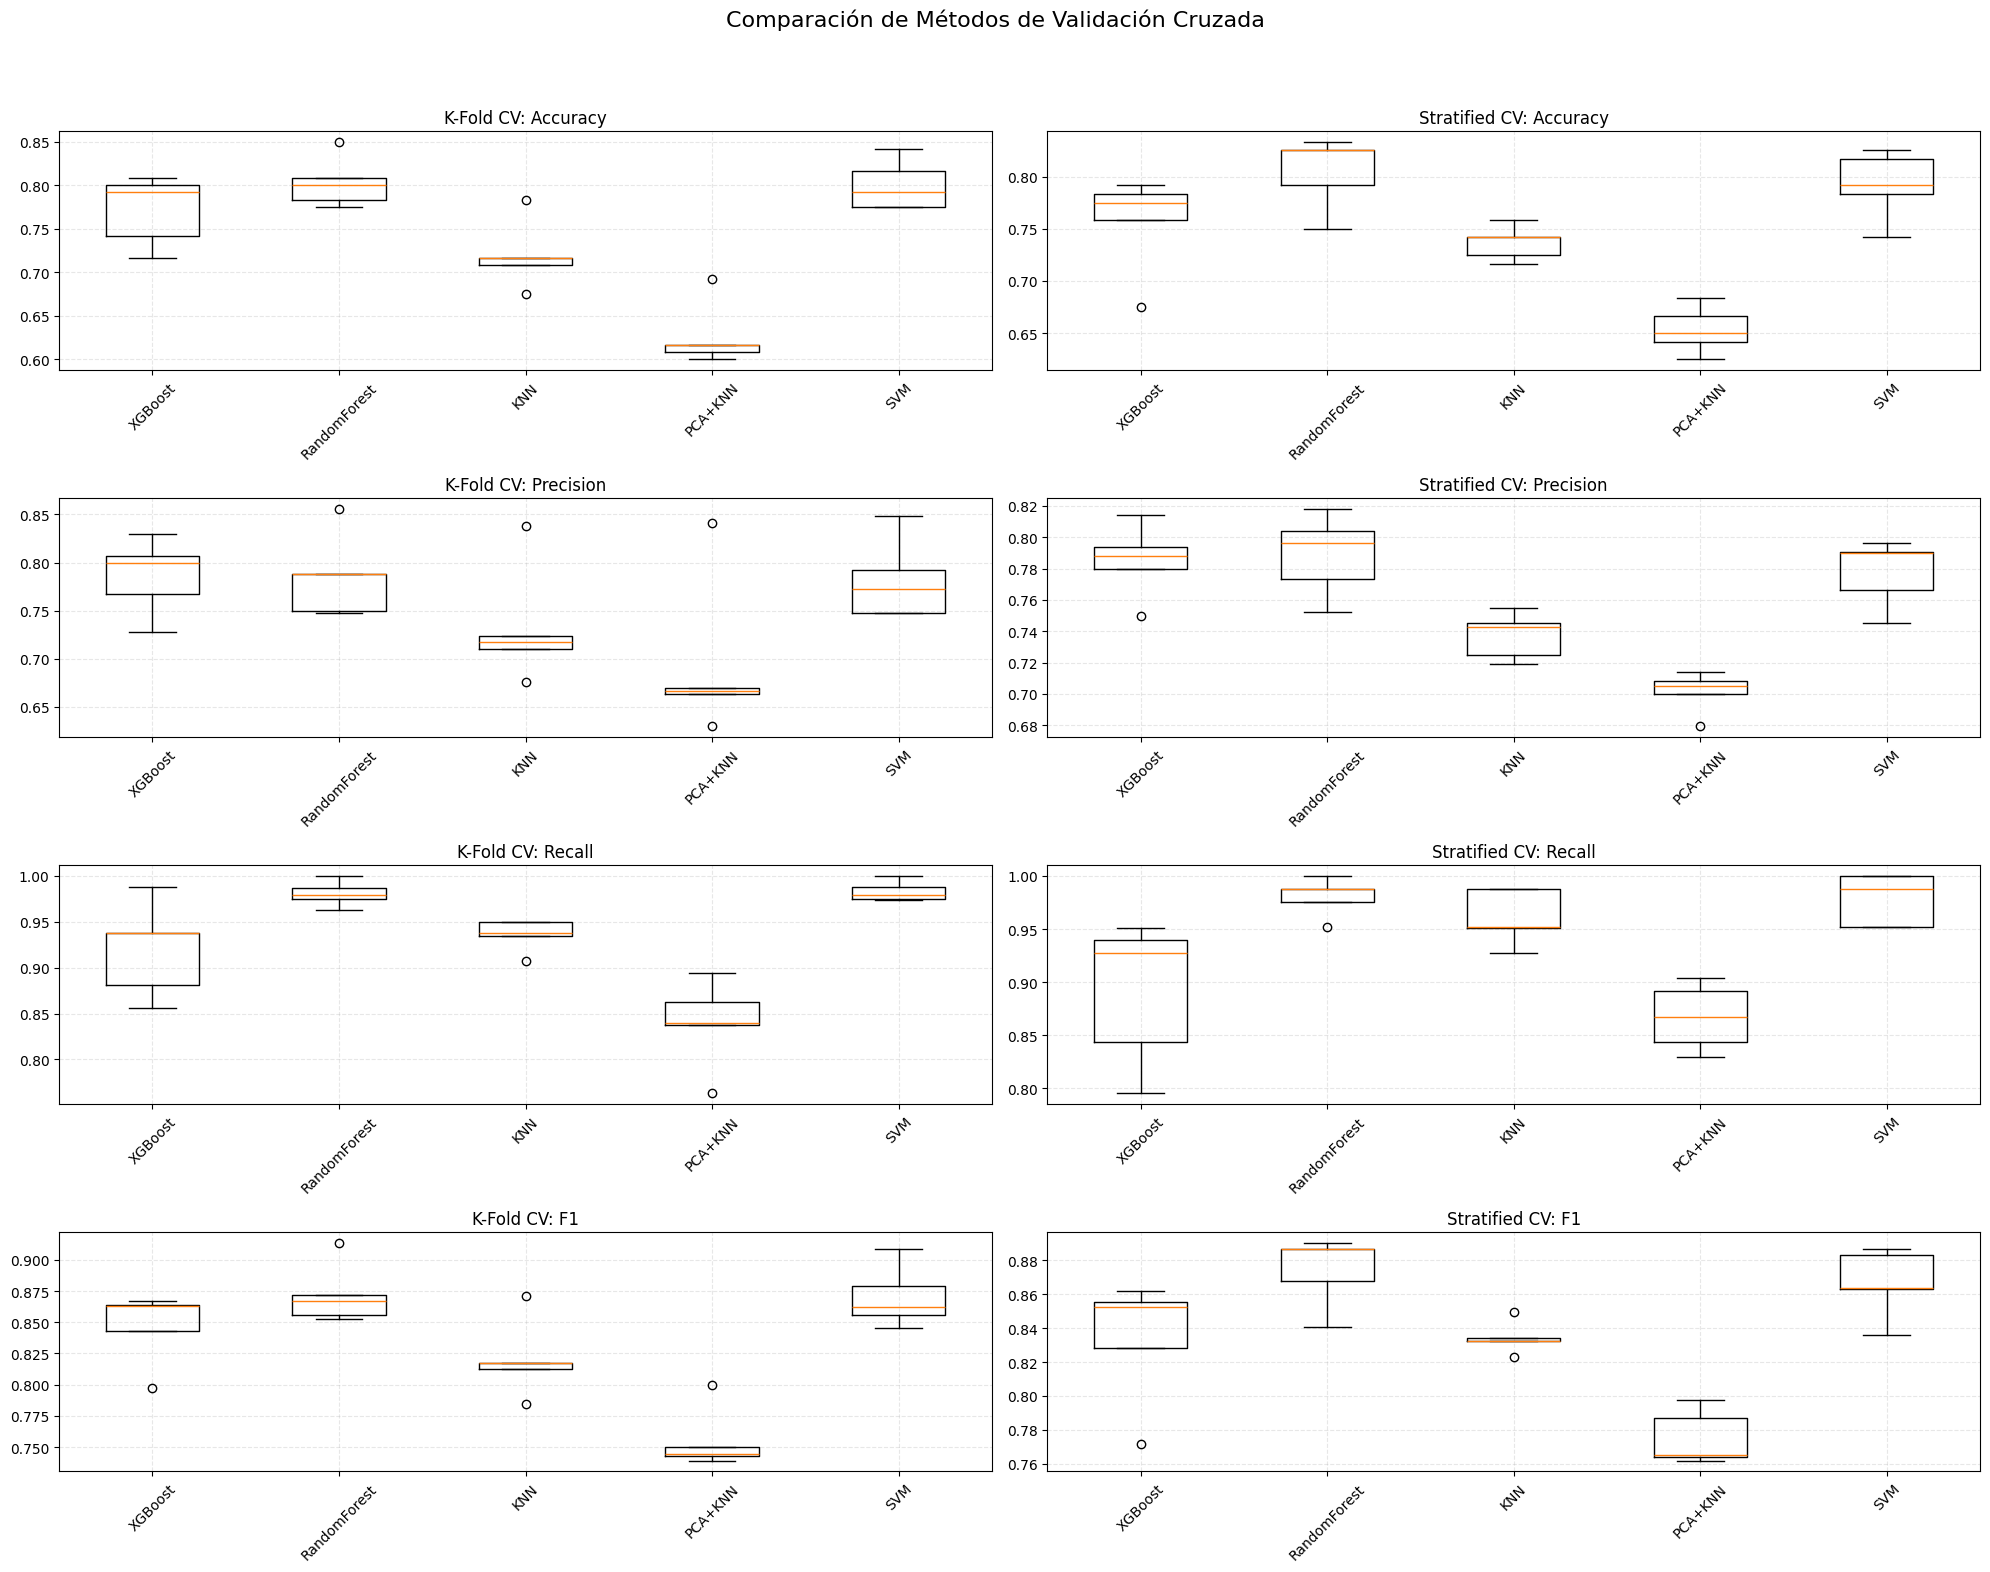


=== Generando Curvas de Aprendizaje ===


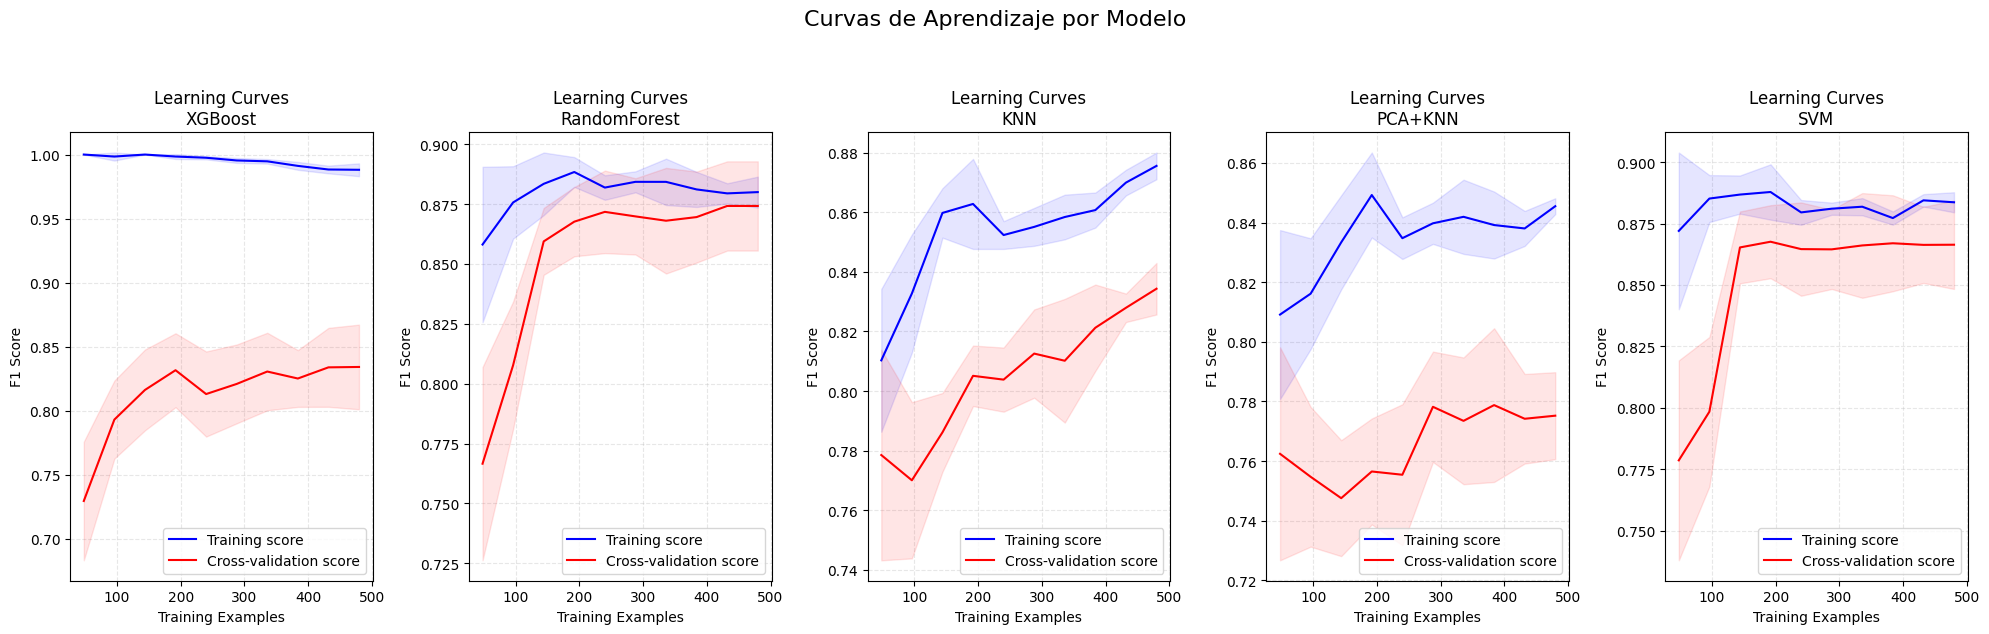

In [20]:
kfold_results, stratified_results, models = run_analysis(X, y)

#BONO
(describir)


=== ANÁLISIS DE CLUSTERING PARA PRÉSTAMOS ===
Cargando datos...

Datos después de la limpieza:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     1.0      0.0         0.0        1.0            0.0           5849.0   
1     1.0      1.0         1.0        1.0            0.0           4583.0   
2     1.0      1.0         0.0        1.0            1.0           3000.0   
3     1.0      1.0         0.0        0.0            0.0           2583.0   
4     1.0      0.0         0.0        1.0            0.0           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Lo

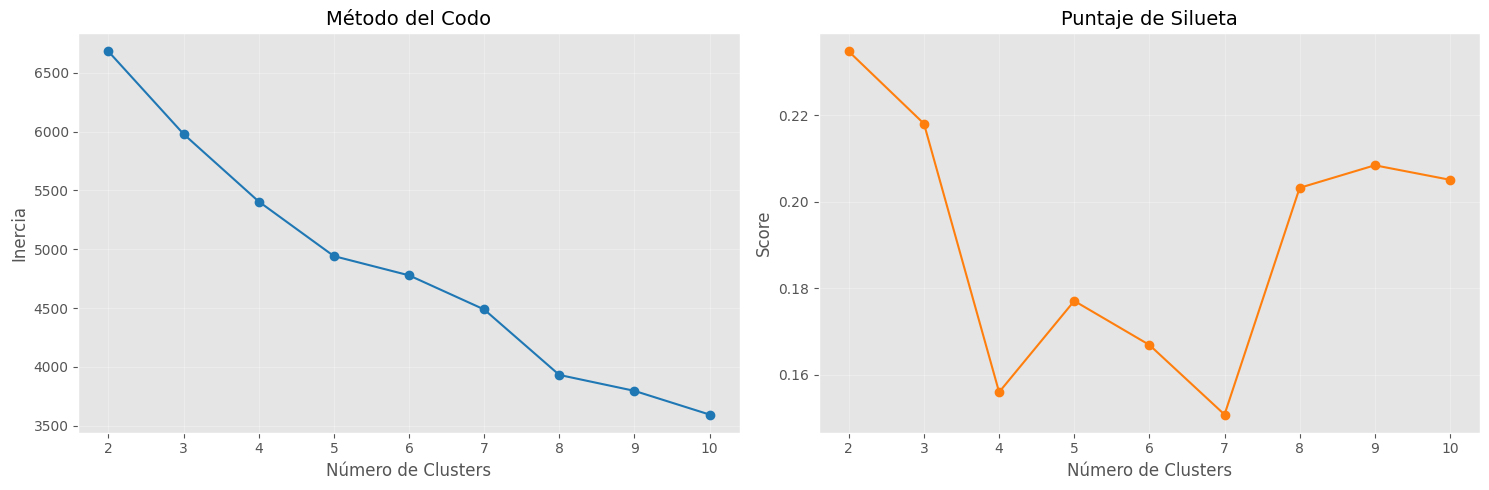


Resultados de reducción dimensional:
Varianza explicada por componentes PCA: 29.06%


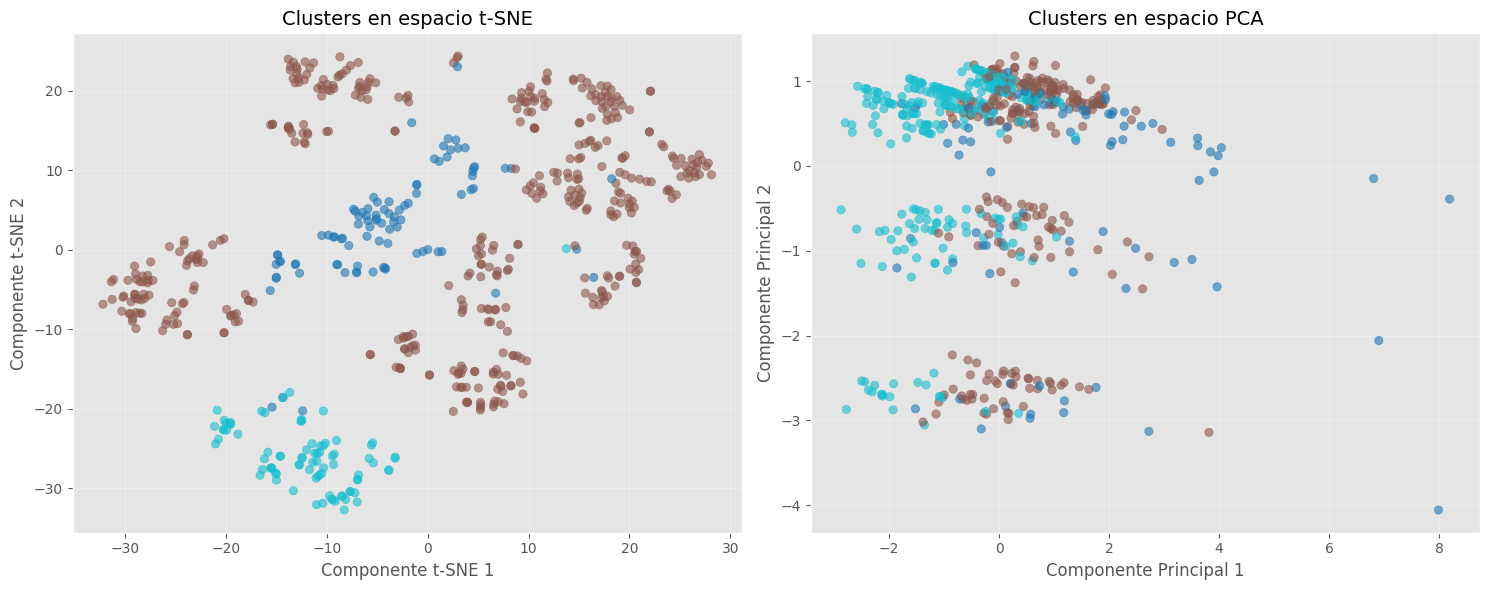


=== MÉTRICAS FINALES ===
Silhouette Score (K-means): 0.218
Silhouette Score (PCA+K-means): 0.107


In [22]:
# --- ANÁLISIS DE CLUSTERING CON K-MEANS PARA LOAN APPROVAL ---

# ===== IMPORTACIÓN DE BIBLIOTECAS =====
# Manipulación de datos
import pandas as pd
import numpy as np
from datasets import load_dataset

# Preprocesamiento y modelos
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# Visualización
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Configuración inicial
plt.style.use('ggplot')
RANDOM_STATE = 42

def load_and_preprocess_data():
    """
    Carga y preprocesa los datos del dataset LoanApprovalPrediction.
    """
    print("Cargando datos...")
    dataset = load_dataset("13nishit/LoanApprovalPrediction")
    df = pd.DataFrame(dataset['train'])

    # Limpieza inicial
    df = df.drop('Loan_ID', axis=1)

    # Mapeo manual de variables categóricas
    categorical_mappings = {
        'Gender': {'Male': 1, 'Female': 0},
        'Married': {'Yes': 1, 'No': 0},
        'Education': {'Graduate': 1, 'Not Graduate': 0},
        'Self_Employed': {'Yes': 1, 'No': 0},
        'Property_Area': {'Urban': 2, 'Semiurban': 1, 'Rural': 0},
        'Loan_Status': {'Y': 1, 'N': 0},
        'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3}
    }

    for col, mapping in categorical_mappings.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)

    # Manejo de valores faltantes
    imputer = SimpleImputer(strategy='median')
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

    # Verificar datos después de la limpieza
    print("\nDatos después de la limpieza:")
    print(df.head())  # Muestra las primeras filas del dataframe
    print("\nInformación del dataframe:")
    print(df.info())  # Muestra información sobre tipos de datos y nulos

    # Estandarización
    print("Estandarizando variables...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[numeric_cols])

    print("\nInformación del dataset procesado:")
    print(f"Muestras: {X_scaled.shape[0]}")
    print(f"Características: {X_scaled.shape[1]}")
    print("Variables utilizadas:", list(numeric_cols))

    return X_scaled, numeric_cols

def find_optimal_clusters(X, max_clusters=10):
    """
    Encuentra el número óptimo de clusters usando métodos de validación.
    """
    inertias = []
    silhouette_scores = []

    print("\nBuscando número óptimo de clusters...")
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
        labels = kmeans.fit_predict(X)

        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))

    # Visualización
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    ax[0].plot(range(2, max_clusters + 1), inertias, marker='o', color='#1f77b4')
    ax[0].set_title('Método del Codo', fontsize=14)
    ax[0].set_xlabel('Número de Clusters')
    ax[0].set_ylabel('Inercia')

    ax[1].plot(range(2, max_clusters + 1), silhouette_scores, marker='o', color='#ff7f0e')
    ax[1].set_title('Puntaje de Silueta', fontsize=14)
    ax[1].set_xlabel('Número de Clusters')
    ax[1].set_ylabel('Score')

    plt.tight_layout()
    plt.show()

    return inertias, silhouette_scores

def apply_clustering(X, n_clusters=3):
    """
    Aplica K-means con y sin reducción de dimensionalidad.
    """
    # K-means estándar
    kmeans_std = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE)
    std_labels = kmeans_std.fit_predict(X)

    # PCA + K-means
    pca = PCA(n_components=0.95, random_state=RANDOM_STATE)
    X_pca = pca.fit_transform(X)
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE)
    pca_labels = kmeans_pca.fit_predict(X_pca)

    # Reducción para visualización
    pca_vis = PCA(n_components=2, random_state=RANDOM_STATE)
    X_vis = pca_vis.fit_transform(X)

    print("\nResultados de reducción dimensional:")
    print(f"Varianza explicada por componentes PCA: {sum(pca_vis.explained_variance_ratio_):.2%}")

    return std_labels, pca_labels, X_vis

def visualize_clusters(X, std_labels, pca_labels, X_vis):
    """
    Visualización de los clusters usando diferentes técnicas.
    """
    # t-SNE para visualización
    tsne = TSNE(n_components=2, random_state=RANDOM_STATE)
    X_tsne = tsne.fit_transform(X)

    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # Visualización t-SNE
    scatter1 = ax[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=std_labels, cmap='tab10', alpha=0.6)
    ax[0].set_title('Clusters en espacio t-SNE', fontsize=14)
    ax[0].set_xlabel('Componente t-SNE 1')
    ax[0].set_ylabel('Componente t-SNE 2')

    # Visualización PCA
    scatter2 = ax[1].scatter(X_vis[:, 0], X_vis[:, 1], c=pca_labels, cmap='tab10', alpha=0.6)
    ax[1].set_title('Clusters en espacio PCA', fontsize=14)
    ax[1].set_xlabel('Componente Principal 1')
    ax[1].set_ylabel('Componente Principal 2')

    plt.tight_layout()
    plt.show()

def main():
    """
    Flujo principal de ejecución del análisis.
    """
    print("\n=== ANÁLISIS DE CLUSTERING PARA PRÉSTAMOS ===")

    # 1. Carga y preprocesamiento
    X, features = load_and_preprocess_data()

    # 2. Determinación de clusters óptimos
    inertias, silhouette_scores = find_optimal_clusters(X)

    # 3. Aplicación de clustering
    optimal_clusters = 3  # Determinar basado en gráficos anteriores
    std_labels, pca_labels, X_vis = apply_clustering(X, optimal_clusters)

    # 4. Visualización
    visualize_clusters(X, std_labels, pca_labels, X_vis)

    # 5. Métricas finales
    print("\n=== MÉTRICAS FINALES ===")
    print(f"Silhouette Score (K-means): {silhouette_score(X, std_labels):.3f}")
    print(f"Silhouette Score (PCA+K-means): {silhouette_score(X_vis, pca_labels):.3f}")

if __name__ == "__main__":
    main()

#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
#Llamar las funciones y los modelos con la base de entrenamiento balanceada


##Versión GridSearch

In [ ]:
# Definir modelos de clasificación
classification_models = {
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)}

# Definir hiperparámetros para GridSearchCV
classification_param_grids = {
    "SVC": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Decision Tree": {"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}}

In [ ]:
# Ejecutar entrenamiento y evaluación
'''
classification_results, classification_best_estimators = train_and_evaluate_classification(
    classification_models, classification_param_grids,
    X_train_balanced, y_train_balanced, X_test_scaled, y_test_class
)
'''